
# Get the data

This is a simple guide on how to download the data using [this API](https://github.com/individual-brain-charting/api). You can also find the reference for the API [here](https://individual-brain-charting.github.io/docs/ibc_api.html).


Import the fetcher as follows:

In [1]:
import ibc_api.utils as ibc

[siibra:INFO] Version: 0.4a47
[siibra:WARNING] This is a development release. Use at your own risk.
[siibra:INFO] Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.


To see what is available for a given data type on IBC, we need fetch the file that contains that information.
The following loads a CSV file with all that info as a pandas dataframe and
saves it as ``ibc_data/available_{data_type}.csv``.

Let's do that for IBC volumetric contrast maps.



In [2]:
db = ibc.get_info(data_type="volume_maps")

Let's see what's in the database



In [3]:
db

,subject,session,desc,hemi,task,direction,run,space,suffix,datatype,extension,contrast,megabytes,dataset,path
0,1,0,preproc,NaN,ArchiSocial,ap,NaN,MNI152NLin2009cAsym,NaN,NaN,.json,false_belief-mechanistic,0.000552,volume_maps,sub-01/ses-00/sub-01_ses-00_task-ArchiSocial_d...
1,1,0,preproc,NaN,ArchiSocial,ap,NaN,MNI152NLin2009cAsym,NaN,NaN,.nii.gz,false_belief-mechanistic,2.896178,volume_maps,sub-01/ses-00/sub-01_ses-00_task-ArchiSocial_d...
2,1,0,preproc,NaN,ArchiSocial,ap,NaN,MNI152NLin2009cAsym,audio,NaN,.json,false_belief-mechanistic_audio,0.000543,volume_maps,sub-01/ses-00/sub-01_ses-00_task-ArchiSocial_d...
3,1,0,preproc,NaN,ArchiSocial,ap,NaN,MNI152NLin2009cAsym,audio,NaN,.nii.gz,false_belief-mechanistic_audio,2.893414,volume_maps,sub-01/ses-00/sub-01_ses-00_task-ArchiSocial_d...
4,1,0,preproc,NaN,ArchiSocial,ap,NaN,MNI152NLin2009cAsym,video,NaN,.json,false_belief-mechanistic_video,0.000543,volume_maps,sub-01/ses-00/sub-01_ses-00_task-ArchiSocial_d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53219,15,40,preproc,NaN,Scene,ffx,NaN,MNI152NLin2009cAsym,correct,NaN,.json,scene_correct-dot_correct,0.000570,volume_maps,sub-15/ses-40/sub-15_ses-40_task-Scene_dir-ffx...
53220,15,40,preproc,NaN,Scene,ffx,NaN,MNI152NLin2009cAsym,correct,NaN,.json,scene_impossible_correct,0.000618,volume_maps,sub-15/ses-40/sub-15_ses-40_task-Scene_dir-ffx...
53221,15,40,preproc,NaN,Scene,ffx,NaN,MNI152NLin2009cAsym,incorrect,NaN,.json,scene_impossible_incorrect,0.000614,volume_maps,sub-15/ses-40/sub-15_ses-40_task-Scene_dir-ffx...
53222,15,40,preproc,NaN,Scene,ffx,NaN,MNI152NLin2009cAsym,correct,NaN,.json,scene_possible_correct-scene_impossible_correct,0.000598,volume_maps,sub-15/ses-40/sub-15_ses-40_task-Scene_dir-ffx...


There are over 26000 statistic maps (half of the rows because there are .json files corresponding to each map) available for download.
But since it's a pandas dataframe, we can filter it to get just what we want.
Let's see how many statistic maps are available for each task.



In [4]:
db["task"].value_counts()

Audio                  5852
MathLanguage           5760
ArchiStandard          3588
RSVPLanguage           3458
MTTNS                  1824
MTTWE                  1824
Audi                   1800
SpatialNavigation      1728
ArchiSocial            1404
Self                   1320
Visu                   1152
BiologicalMotion2      1100
VSTMC                  1100
BiologicalMotion1      1100
HcpWm                  1092
ArchiSpatial           1092
ArchiEmotional         1092
FaceBody                945
RewProc                 918
HcpMotor                858
MVEB                    792
DotPatterns             726
NARPS                   720
Scene                   693
Attention               660
EmoReco                 660
WardAndAllport          660
TwoByTwo                660
MCSE                    648
Moto                    648
SelectiveStopSignal     528
StopNogo                462
Lec1                    432
MVIS                    432
EmoMem                  396
VSTM                

You can find the descriptions of all these tasks [here](https://individual-brain-charting.github.io/docs/tasks.html).



For this example, let's just download the maps from Discount task, only for sub-08. You can filter the maps for tasks and subjects like this.


In [5]:
filtered_db = ibc.filter_data(db, task_list=["Discount"], subject_list=["08"])
filtered_db

,subject,session,desc,hemi,task,direction,run,space,suffix,datatype,extension,contrast,megabytes,dataset,path
25624,8,27,preproc,NaN,Discount,ap,NaN,MNI152NLin2009cAsym,NaN,NaN,.json,amount,0.000503,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...
25625,8,27,preproc,NaN,Discount,ap,NaN,MNI152NLin2009cAsym,NaN,NaN,.nii.gz,amount,2.921305,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...
25626,8,27,preproc,NaN,Discount,ap,NaN,MNI152NLin2009cAsym,NaN,NaN,.json,delay,0.000505,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...
25627,8,27,preproc,NaN,Discount,ap,NaN,MNI152NLin2009cAsym,NaN,NaN,.nii.gz,delay,2.923846,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...
25628,8,27,preproc,NaN,Discount,ffx,NaN,MNI152NLin2009cAsym,NaN,NaN,.json,amount,0.000504,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...
25629,8,27,preproc,NaN,Discount,ffx,NaN,MNI152NLin2009cAsym,NaN,NaN,.nii.gz,amount,2.925251,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...
25630,8,27,preproc,NaN,Discount,ffx,NaN,MNI152NLin2009cAsym,NaN,NaN,.json,delay,0.000506,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...
25631,8,27,preproc,NaN,Discount,ffx,NaN,MNI152NLin2009cAsym,NaN,NaN,.nii.gz,delay,2.925747,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...
25632,8,27,preproc,NaN,Discount,pa,NaN,MNI152NLin2009cAsym,NaN,NaN,.json,amount,0.000503,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...
25633,8,27,preproc,NaN,Discount,pa,NaN,MNI152NLin2009cAsym,NaN,NaN,.nii.gz,amount,2.921803,volume_maps,sub-08/ses-27/sub-08_ses-27_task-Discount_dir-...


Now before we download these files, we need to authenticate with EBRAINS. This will return a link that takes you to EBRAINS login page and stores an access token locally.



In [6]:
ibc.authenticate()

***
To continue, please go to https://iam.ebrains.eu/auth/realms/hbp/device?user_code=PJZA-ZYFD
***
ebrains token successfuly set.


Now we are ready to download the few selected maps that we filtered.

The following will save the requested maps under
``ibc_data/resulting_smooth_maps/sub-08/task-Discount`` 
(or whatever subject you chose). And will also create a local CSV file ``ibc_data/downloaded_volume_maps.csv`` to track the downloaded files. This will contain local file paths and the time they were downloaded at, and is updated everytime you download new files.


In [7]:
downloaded_db = ibc.download_data(filtered_db)
downloaded_db

[siibra:INFO] 139625 objects found for dataset ad04f919-7dcc-48d9-864a-d7b62af3d49d returned.
12it [00:01, 11.98it/s]

Downloaded requested files from IBC volume_maps dataset. See ibc_data/downloaded_volume_maps.csv for details.


,local_path,downloaded_on
0,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:26.487741
1,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:26.648913
2,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:26.653503
3,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:26.814249
4,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:26.819123
5,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:26.977666
6,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:26.982402
7,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:27.145525
8,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:27.150311
9,ibc_data/volume_maps/sub-08/ses-27/sub-08_ses-...,2023-08-24 15:29:27.315582


Let's try plotting one of these contrast maps

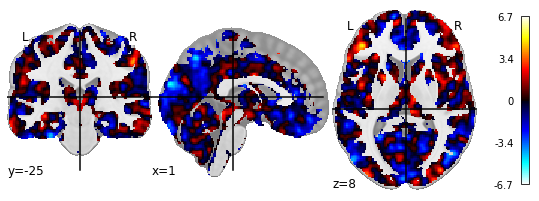

In [8]:
from nilearn.plotting import plot_stat_map

map_path = downloaded_db["local_path"][1]
plot_stat_map(map_path)